# Car plates detection

In [1]:
import data_preparation as dp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2 as cv
import layers

## 1. Data preparation and visualization

### 1.1 Raw data

In [2]:
sources = [
    ("./data/original/plates.csv", "./data/original/photos/"),
]

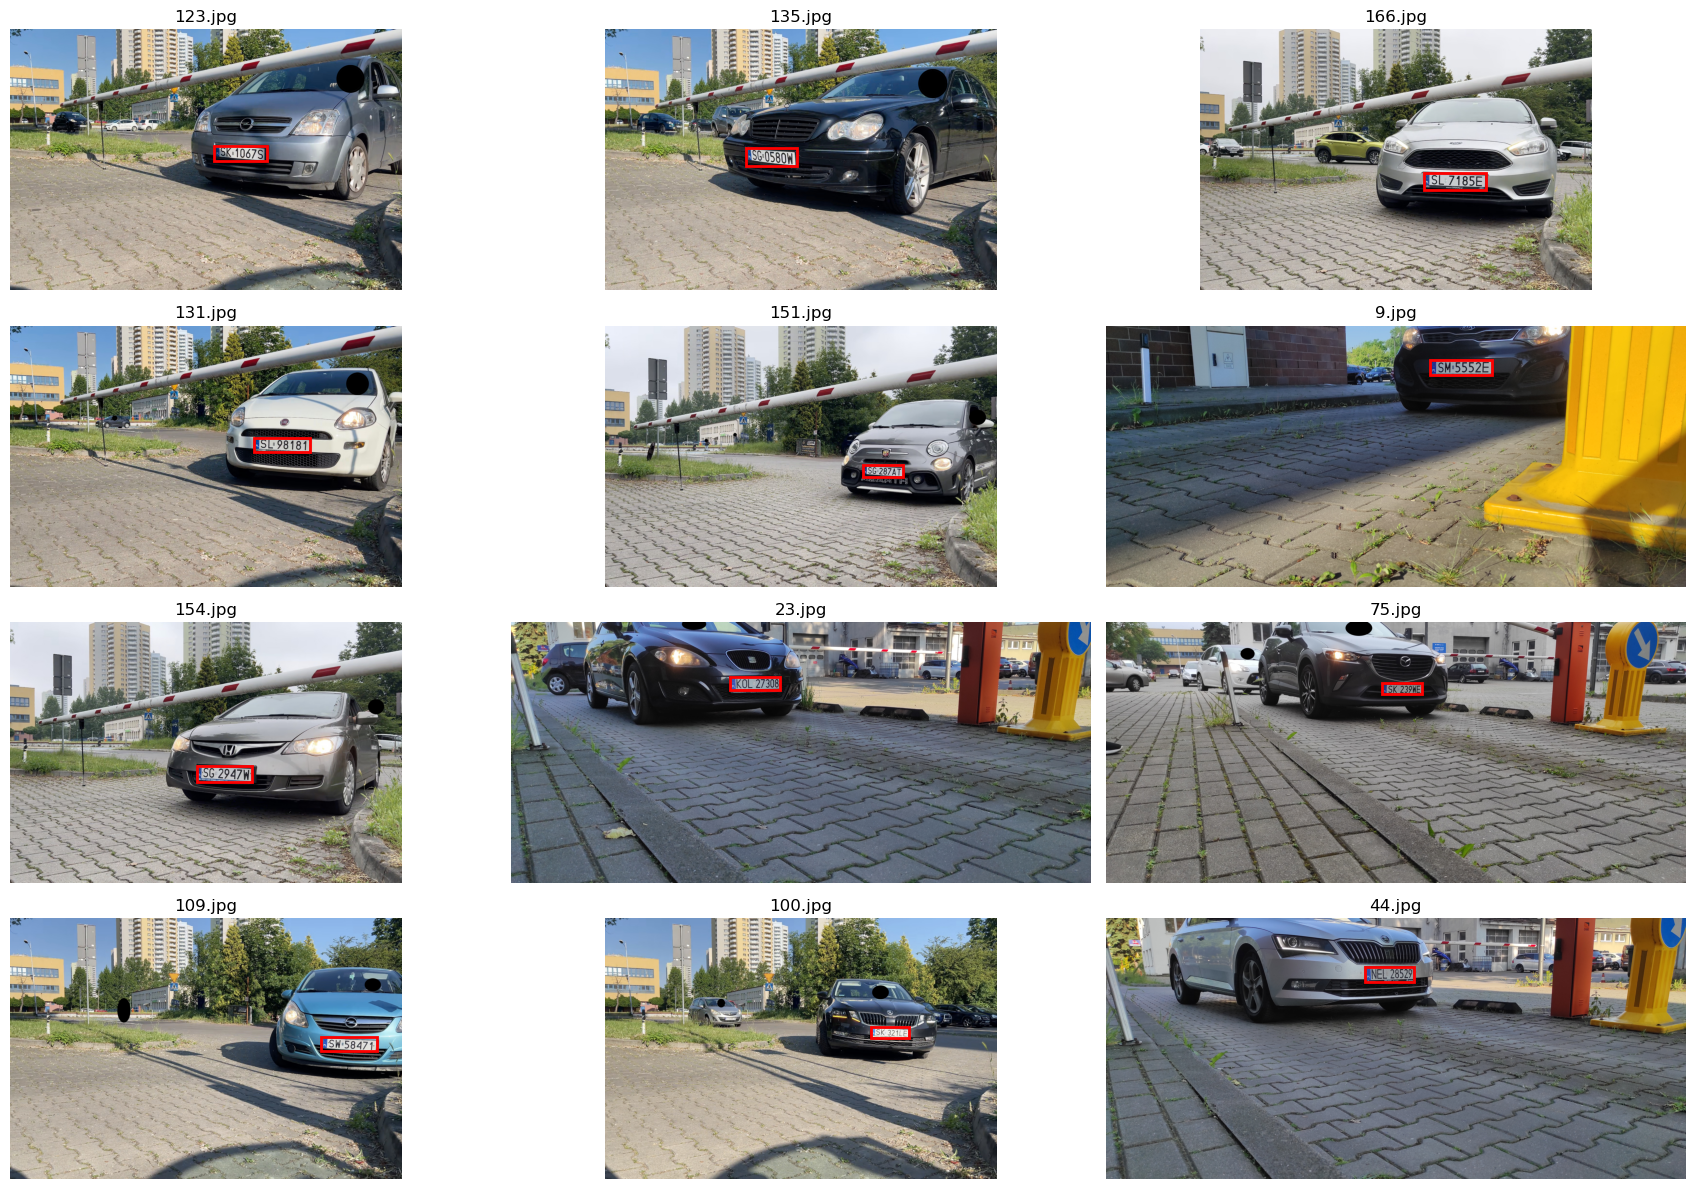

In [3]:
all_data = dp.data_list_from_multiple_csv(sources)
dp.plot_images_with_bounding_boxes(all_data)

In [4]:
img = cv.imread(all_data[42]['X'])

In [5]:
img_array = np.array(img)
img_array

array([[[ 75,  45,  16],
        [ 72,  44,  14],
        [ 81,  57,  29],
        ...,
        [ 14,  11,   3],
        [ 12,   8,   3],
        [ 13,   9,   4]],

       [[ 84,  54,  25],
        [ 72,  44,  14],
        [ 65,  41,  13],
        ...,
        [ 52,  49,  41],
        [ 69,  65,  60],
        [ 79,  75,  70]],

       [[111,  79,  50],
        [101,  71,  42],
        [ 91,  65,  35],
        ...,
        [126, 123, 115],
        [145, 141, 136],
        [156, 152, 147]],

       ...,

       [[158, 173, 189],
        [162, 177, 193],
        [163, 178, 194],
        ...,
        [ 62,  61,  65],
        [ 66,  68,  69],
        [ 68,  70,  71]],

       [[142, 157, 173],
        [145, 160, 176],
        [149, 164, 180],
        ...,
        [ 63,  62,  66],
        [ 67,  69,  70],
        [ 74,  76,  77]],

       [[147, 162, 178],
        [144, 159, 175],
        [139, 154, 170],
        ...,
        [ 68,  67,  71],
        [ 70,  72,  73],
        [ 80,  82,  83]]

In [6]:
img_array.shape

(1524, 2284, 3)

### 1.2 Resizing images

In [7]:
new_width = 320
new_height = 200

all_data_resized = dp.img_set_size(all_data, new_width, new_height)

processing 1/5
processing 2/5
processing 3/5
processing 4/5
processing 5/5


In [8]:
len(all_data_resized)

195

### 1.3 Converting to grayscale

In [9]:
all_data_processed = dp.data_list_processed(all_data_resized)

In [10]:
all_data_processed[0]

{'X': array([[ 49,  55,  59, ..., 110,  95,  89],
        [ 49,  54,  63, ...,  87, 102, 113],
        [ 45,  51,  70, ..., 105,  82, 109],
        ...,
        [125, 127, 107, ..., 140, 139, 131],
        [112, 121, 128, ..., 140, 120, 127],
        [129, 124, 149, ..., 125,  99,  81]], dtype=uint8),
 'Y': [0.4591379310344828,
  0.209477969348659,
  0.5258663793103449,
  0.25090996168582375],
 'true_size_size': [4640.0, 2088.0],
 'filename': '69.jpg'}

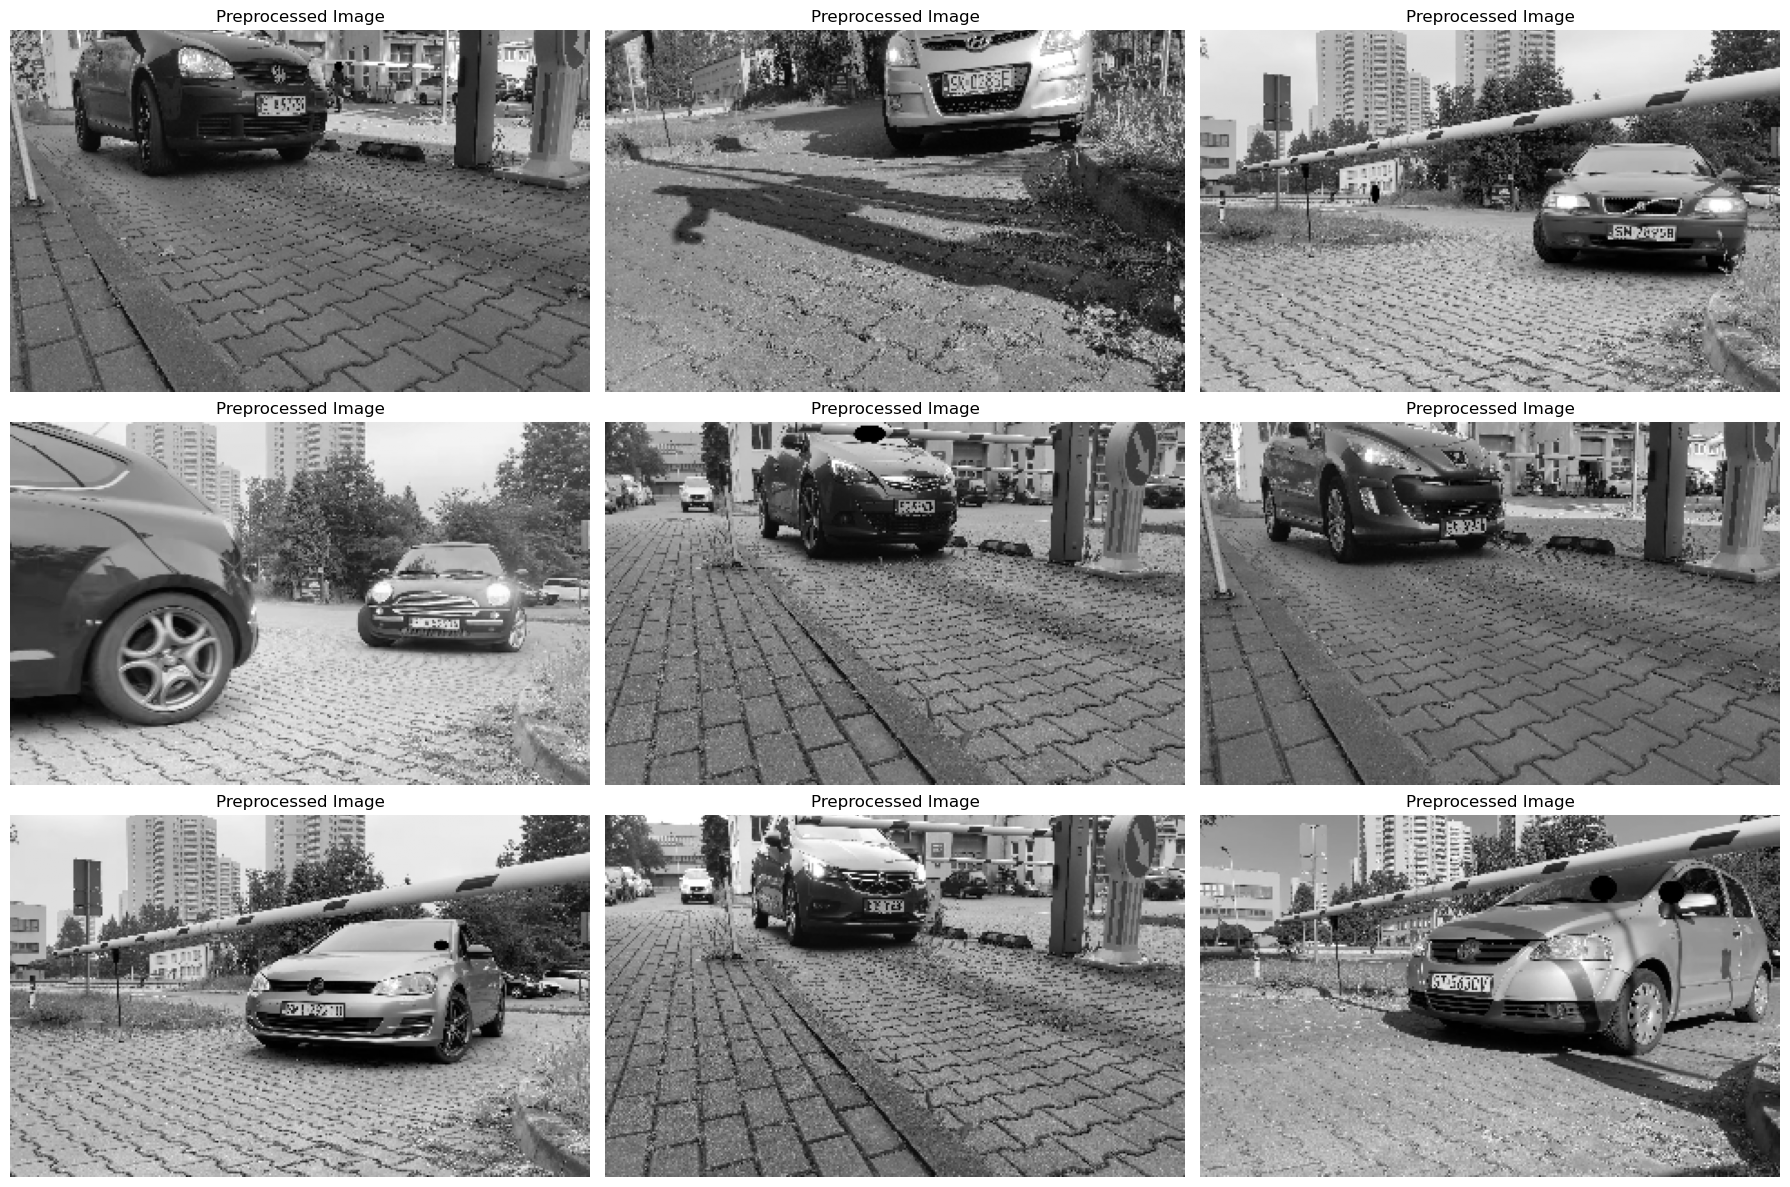

In [11]:
number_of_examples = len(all_data_processed)

fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(18,12))
axes = axes.flatten()
for ax in axes:
    idx = random.randint(0, len(all_data_processed) - 1)
    example = all_data_processed[idx]

    # Red bounding box
    xtl, ytl, xbr, ybr = map(float, example['Y'])
    xtl = xtl * new_width
    ytl = ytl * new_height
    xbr = xbr * new_width
    ybr = ybr * new_height    
    width = xbr - xtl
    height = ybr - ytl   
    # rect = patches.Rectangle((xtl, ytl), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add rectangle to axis
    # ax.add_patch(rect)
    
    ax.set_title("Preprocessed Image")
    ax.imshow(example['X'], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
type(all_data_processed)

list

In [13]:
X = np.array([example['X'] for example in all_data_processed])
Y = np.array([example['Y'] for example in all_data_processed])
print(f"Input feature (X): {X.shape}, target (Y): {Y.shape}")

Input feature (X): (195, 200, 320), target (Y): (195, 4)


In [14]:
all_data_processed[0]['X'].shape

(200, 320)

### 1.4 Normalize input data

In [15]:
X, Y, original_size, filename = dp.normalize_data_input(all_data_processed)

Input feature (X): (195, 200, 320, 1), target (Y): (195, 4)


In [16]:
X[0]

array([[[0.19215687],
        [0.21568628],
        [0.23137255],
        ...,
        [0.43137255],
        [0.37254903],
        [0.34901962]],

       [[0.19215687],
        [0.21176471],
        [0.24705882],
        ...,
        [0.34117648],
        [0.4       ],
        [0.44313726]],

       [[0.1764706 ],
        [0.2       ],
        [0.27450982],
        ...,
        [0.4117647 ],
        [0.32156864],
        [0.42745098]],

       ...,

       [[0.49019608],
        [0.49803922],
        [0.41960785],
        ...,
        [0.54901963],
        [0.54509807],
        [0.5137255 ]],

       [[0.4392157 ],
        [0.4745098 ],
        [0.5019608 ],
        ...,
        [0.54901963],
        [0.47058824],
        [0.49803922]],

       [[0.5058824 ],
        [0.4862745 ],
        [0.58431375],
        ...,
        [0.49019608],
        [0.3882353 ],
        [0.31764707]]], dtype=float32)

### 1.6 Split data to train, test and validation set

In [17]:
X_train, Y_train, X_test, Y_test, X_val, Y_val, original_train, original_test, original_val, filename_train, filename_test, filename_val = dp.data_split(X, Y, original_size, filename)

Number of examples in train set: 137
Number of examples in test set: 29
Number of examples in validation set: 29


In [18]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test), len(X_val), len(Y_val))

137 137 29 29 29 29


In [19]:
original_train[0]

array([4640, 2088], dtype=int32)

In [20]:
X_train.shape

(137, 200, 320, 1)

In [21]:
Y_train.shape

(137, 4)

In [22]:
X_train[0].shape

(200, 320, 1)

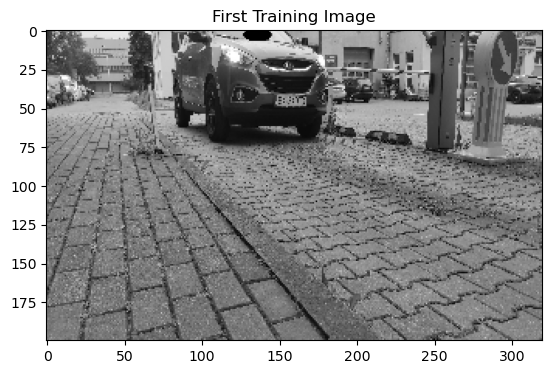

In [23]:
# X_train[0] shape (height, width, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title("First Training Image")
plt.show()

## 2. Forward propagation 

CNN structure:
1. Input (normalized images data) (batch_size, height, width, channels)
1. First Convolution:
    1. Convolutional layer
    2. ReLU Activation layer
    3. MaxPooling layer
2. Second Convolution:
    1. Convolutional layer
    2. ReLU Activation layer
    3. MaxPooling layer
3. Flattening
4. Fully Connected (Dense) layer
5. Output (xlt, ylt, xrb, yrb)

### 2.1 First Convolution

#### 2.1.1 Convolutional layer

In [24]:
conv = layers.Conv(8, 3, 1)
conv_out = conv.forward(X_train[0:2])
conv_out.shape

(2, 198, 318, 8)

In [25]:
filter_0_map = conv_out[0, :, :, :]
filter_0_map.shape

(198, 318, 8)

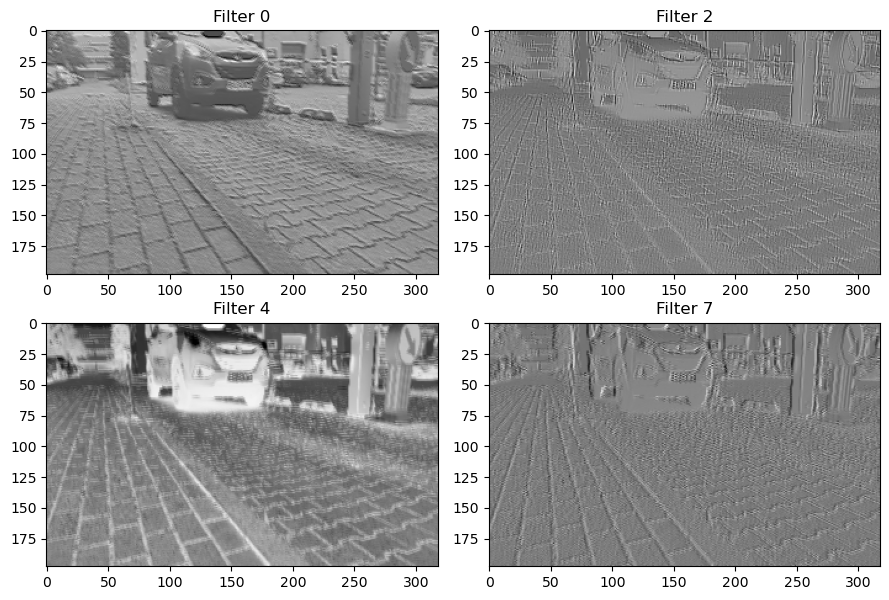

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 2, 4, 7]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(conv_out[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

#### 2.1.2 ReLU Activation

In [27]:
relu = layers.ReLU()
relu_out = relu.forward(conv_out)
relu_out.shape

(2, 198, 318, 8)

#### 2.1.3 MaxPooling layer

In [28]:
maxpool = layers.MaxPool(2)
maxpool_out = maxpool.forward(relu_out)
maxpool_out.shape

(2, 99, 159, 8)

In [29]:
pool_filter_0_map = maxpool_out[0, :, :, :]
pool_filter_0_map.shape

(99, 159, 8)

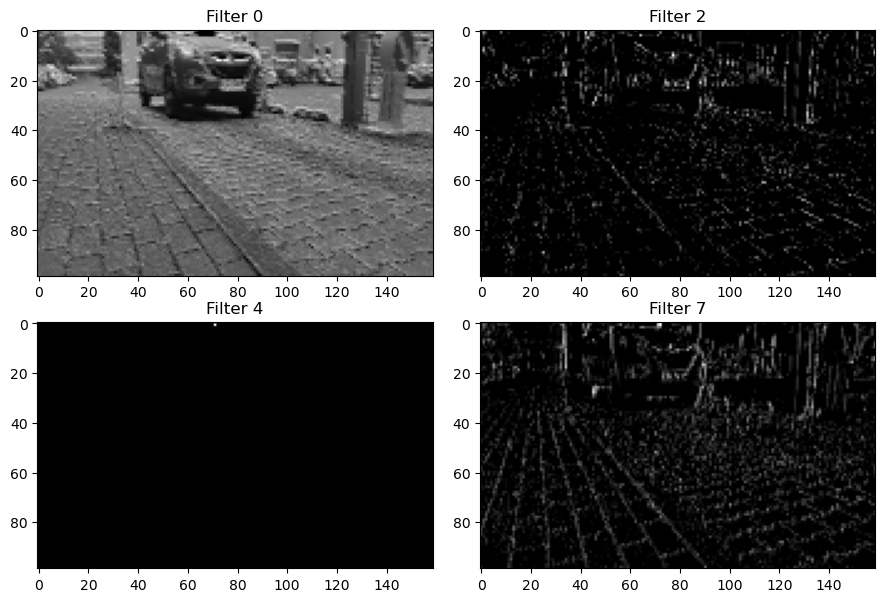

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 2, 4, 7]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(maxpool_out[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

### 2.2 Second Convolution

#### 2.2.1 Convolutional layer

In [31]:
conv2 = layers.Conv(16,3,8)
conv_out2 = conv2.forward(maxpool_out)
conv_out2.shape

(2, 97, 157, 16)

#### 2.2.2 ReLU Activation

In [32]:
relu2 = layers.ReLU()
relu_out2 = relu2.forward(conv_out2)
relu_out2.shape

(2, 97, 157, 16)

#### 2.2.3 MaxPooling layer

In [33]:
maxpool2 = layers.MaxPool(2)
maxpool_out2 = maxpool2.forward(relu_out2)
maxpool_out2.shape

(2, 48, 78, 16)

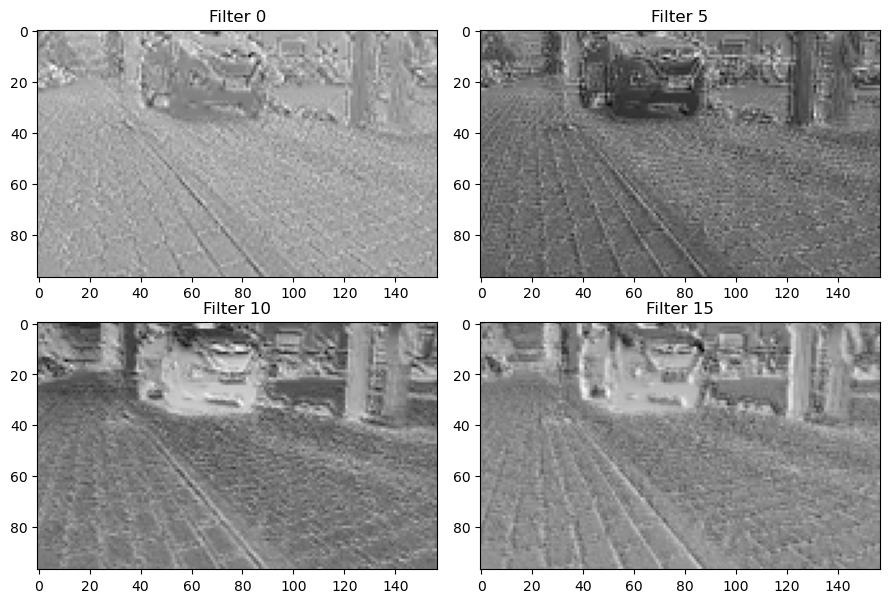

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 5, 10, 15]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(conv_out2[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

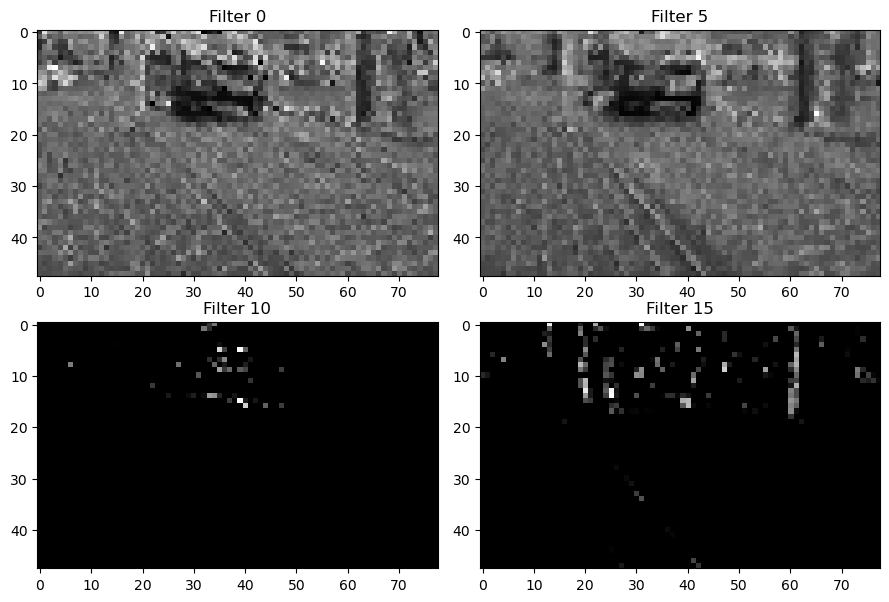

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

filters = [0, 5, 10, 15]

for i, f in enumerate(filters):
    plt.subplot(2, 2, i + 1)
    plt.imshow(maxpool_out2[0, :, :, f], cmap='gray')
    plt.title(f'Filter {f}')

plt.tight_layout()
plt.show()

### 2.3 Flattening

In [36]:
flatten = layers.Flatten()
flat_out = flatten.forward(maxpool_out2)
flat_out.shape

(2, 59904)

In [37]:
flat_out[0, :20]

array([0.03068294, 0.        , 0.        , 0.19598437, 0.16616332,
       0.10099209, 0.09539492, 0.        , 0.10879242, 0.        ,
       0.        , 0.        , 0.09092846, 0.        , 0.21066276,
       0.        , 0.12224507, 0.        , 0.        , 0.11245674])

### 2.4 Fully Connected (Dense)

In [38]:
fc = layers.Dense(flat_out.shape[1], 4)
fc_out = fc.forward(flat_out) 
fc_out.shape

(2, 4)

In [39]:
print("Predicted bbox values (normalized) for first element:", fc_out[0, :])

Predicted bbox values (normalized) for first element: [ 1.17874189  0.5585264   3.49861527 -0.50875478]


In [40]:
predicted_values = dp.output_array_tolist(fc_out[0, :])
predicted_values

[1.1787418872055158,
 0.5585264038266374,
 3.498615268949573,
 -0.5087547768318811]

In [41]:
predicted_values2 = dp.output_array_tolist(fc_out[1, :])
predicted_values2

[2.6235064409110977,
 1.186609581425611,
 4.8557279534841395,
 -1.2035402471218923]

### 2.5 MSE Loss function

In [42]:
mse_loss = layers.MSELoss()

In [43]:
loss = mse_loss.forward(Y_train[:2], fc_out)
grad = mse_loss.backward()
print(f"Loss: {loss}\nGrad: {grad}")

Loss: 4.290879557397242
Grad: [[-0.17990099 -0.08726211 -0.74318722  0.18991618]
 [-0.49750971 -0.18253494 -1.02631267  0.42768296]]


Manual checking:

In [44]:
X_train[:1].shape

(1, 200, 320, 1)

In [45]:
Y_train[:1]

array([[0.45913792, 0.20947798, 0.5258664 , 0.25090995]], dtype=float32)

In [46]:
y_t = dp.output_array_tolist(Y_train[0])
y_t2 = dp.output_array_tolist(Y_train[1])
y_t, y_t2

([0.4591379165649414,
  0.2094779759645462,
  0.5258663892745972,
  0.2509099543094635],
 [0.6334676146507263,
  0.4564698040485382,
  0.7504772543907166,
  0.5071915984153748])

In [47]:
loss_man = (1 / 8) * (((y_t[0] - predicted_values[0]) ** 2) + ((y_t[1] - predicted_values[1]) ** 2) + ((y_t[2] - predicted_values[2]) ** 2) + ((y_t[3] - predicted_values[3]) ** 2)
                     + ((y_t2[0] - predicted_values2[0]) ** 2) + ((y_t2[1] - predicted_values2[1]) ** 2) + ((y_t2[2] - predicted_values2[2]) ** 2) + ((y_t2[3] - predicted_values2[3]) ** 2))
loss_man

4.290879557397242

In [48]:
grad_man = (2 / 8) * ((predicted_values[0] - y_t[0]))

In [49]:
print(f"xtl gradient value for X_train[0]: {grad_man}")

xtl gradient value for X_train[0]: 0.1799009926601436


Manual checking provided accuracy of output.

## 3. Backward propagation 

In [50]:
grad_fc = fc.backward(grad, 1)

In [51]:
grad_fc.shape

(2, 59904)

In [52]:
grad_flat = flatten.backward(grad_fc, 1)

In [53]:
grad_flat.shape

(2, 48, 78, 16)

In [54]:
grad_maxpool2 = maxpool2.backward(grad_flat)

In [55]:
grad_maxpool2.shape

(2, 97, 157, 16)

In [56]:
grad_relu2 = relu2.backward(grad_maxpool2)

In [57]:
grad_relu2.shape

(2, 97, 157, 16)

In [58]:
grad_conv2 = conv2.backward(grad_relu2, 1)

In [59]:
grad_conv2.shape

(2, 99, 159, 8)

In [60]:
grad_maxpool = maxpool.backward(grad_conv2)

In [61]:
grad_maxpool.shape

(2, 198, 318, 8)

In [62]:
grad_relu = relu.backward(grad_maxpool)

In [63]:
grad_relu.shape

(2, 198, 318, 8)

In [64]:
grad_conv = conv.backward(grad_relu, 1)

In [65]:
grad_conv.shape

(2, 200, 320, 1)